# mmdlith
Detect defects in a microelectronic circuit.

# Description

The input image is a gray-scale image of a microelectronic circuit. The relevant objects in this image are vertical metal stripes. These stripes have some irregularities that should be detected. Our procedure takes the residues of a gray-scale closing and filter (by size) the threshold of the residues.


In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt

# Reading

The gray scale image to be processed is read. 

(-0.5, 253.5, 254.5, -0.5)

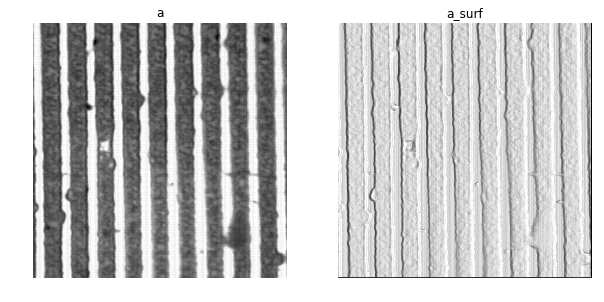

In [2]:
a_pil = Image.open('../data/r4x2_256.tif').convert('L')
a = np.array (a_pil)
a_surf = ia.iagsurf(a)

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('a')
axes[0].imshow(a, cmap='gray')
axes[0].axis('off')
axes[1].set_title('a_surf')
axes[1].imshow(a_surf, cmap='gray')
axes[1].axis('off')

# Closing

Closing of the image by a vertical line of length 25 pixels. Then subtract it from the original. The sequence closing-subtraction is called closing top-hat. (This could be executed in a single command: c= mmcloseth (a, mmseline (25,90));). 

(-0.5, 253.5, 254.5, -0.5)

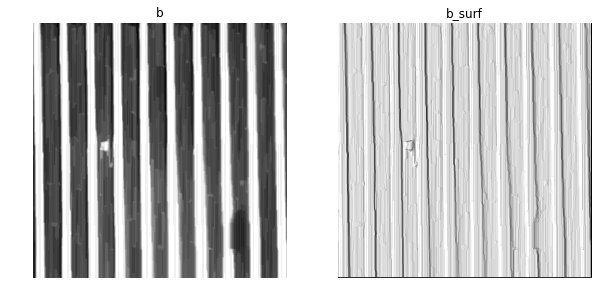

In [3]:
b = ia.iaclose(a,ia.iaseline(25,90));
b_surf = ia.iagsurf(b)

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('b')
axes[0].imshow(b, cmap='gray')
axes[0].axis('off')
axes[1].set_title('b_surf')
axes[1].imshow(b_surf, cmap='gray')
axes[1].axis('off')

# Subtraction

Subtraction of the closing from the original is called closing top-hat. It shows the discrepancies of the image where the structuring element cannot fit the surface. In this case, it highlights vertical depression with length longer than 25 pixels.

(-0.5, 253.5, 254.5, -0.5)

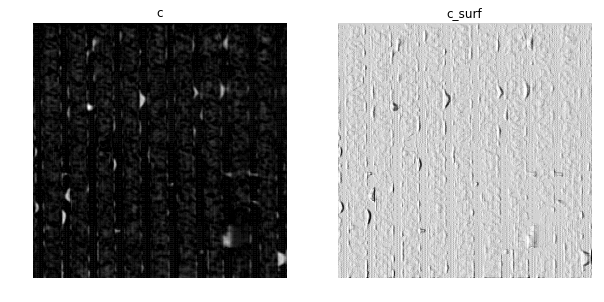

In [4]:
c = ia.iasubm(b,a);
c_surf = ia.iagsurf(c)

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('c')
axes[0].imshow(c, cmap='gray')
axes[0].axis('off')
axes[1].set_title('c_surf')
axes[1].imshow(c_surf, cmap='gray')
axes[1].axis('off')

## Thresholding and Area Open

Threshold on the residues image. Elimination of the small objects by area open. 

(-0.5, 253.5, 254.5, -0.5)

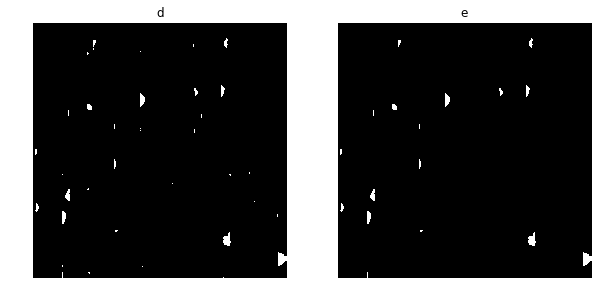

In [5]:
d = ia.iacmp(c,'>=',50);
e = ia.iaareaopen(d,5);

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('d')
axes[0].imshow(d, cmap='gray')
axes[0].axis('off')
axes[1].set_title('e')
axes[1].imshow(e, cmap='gray')
axes[1].axis('off')

## Final display

Overlay the detected defects over the original image, and over the surface display. 

(-0.5, 253.5, 254.5, -0.5)

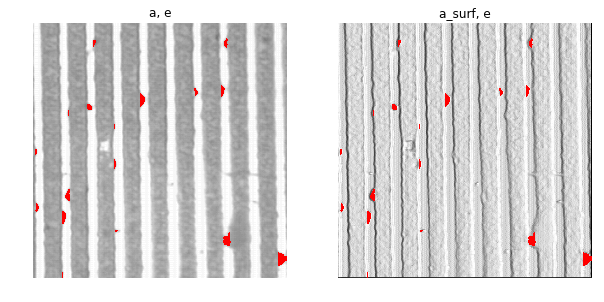

In [6]:
(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('a, e')
axes[0].imshow(ia.iagshow(a, e).transpose(1, 2, 0))
axes[0].axis('off')
axes[1].set_title('a_surf, e')
axes[1].imshow(ia.iagshow(a_surf, e).transpose(1, 2, 0))
axes[1].axis('off')